In [37]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
#https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
# Download necessary NLTK data
nltk.download('stopwords')

# Load CSV file
pf = pd.read_csv(r'C:\Downloads\archive\Combined Data.csv', 
                 header=None, names=['SNo', 'Problem', 'Result'])

# Drop the first row if it contains headers
pf = pf.drop(0)

# Convert column data to string and handle missing values
pf['Problem'] = pf['Problem'].fillna('').astype(str)
pf['Result'] = pf['Result'].fillna('').astype(str)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
print(pf.head())

   SNo                                            Problem   Result
1  0.0                                         oh my gosh  Anxiety
2  1.0  trouble sleeping, confused mind, restless hear...  Anxiety
3  2.0  All wrong, back off dear, forward doubt. Stay ...  Anxiety
4  3.0  I've shifted my focus to something else but I'...  Anxiety
5  4.0  I'm restless and restless, it's been a month n...  Anxiety


In [ ]:
# Define the normalization function
def normalizeString(data):
    if not isinstance(data, str):  
        data = str(data)  # Convert non-string values to string
    
    data = data.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    data = data.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))  # Get English stopwords
    data = ' '.join(word for word in data.split() if word not in stop_words)  # Remove stopwords
    return data

# Apply normalization
pf['Problem'] = pf['Problem'].apply(normalizeString)
pf['Result'] = pf['Result'].apply(normalizeString)

# Display the cleaned DataFrame
print(pf)


kl.bj

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           SNo                                            Problem   Result
1          0.0                                            oh gosh  anxiety
2          1.0  trouble sleeping confused mind restless heart ...  anxiety
3          2.0  wrong back dear forward doubt stay restless re...  anxiety
4          3.0  ive shifted focus something else im still worried  anxiety
5          4.0                im restless restless month boy mean  anxiety
...        ...                                                ...      ...
53039  53038.0  nobody takes seriously i’ve 24m dealt depressi...  anxiety
53040  53039.0  selfishness dont feel good like dont belong wo...  anxiety
53041  53040.0  way sleep better cant sleep nights meds didnt ...  anxiety
53042  53041.0  public speaking tips hi give presentation work...  anxiety
53043  53042.0  really bad door anxiety scared didnt lock door...  anxiety

[53043 rows x 3 columns]
Accuracy: 0.7583184088981054
Classification Report:
                      

In [36]:
print(pf.head())

   SNo                                            Problem   Result
1  0.0                                            oh gosh  anxiety
2  1.0  trouble sleeping confused mind restless heart ...  anxiety
3  2.0  wrong back dear forward doubt stay restless re...  anxiety
4  3.0  ive shifted focus something else im still worried  anxiety
5  4.0                im restless restless month boy mean  anxiety


In [35]:
type(classification_reportlr)

str

In [40]:
#Random forest Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_scorerfm=accuracy_score(y_test, y_pred)
classification_reportrfm=classification_report(y_test, y_pred)
confusion_matrixrfm=confusion_matrix(y_test, y_pred)
print('Accuracy:',accuracy_scorerfm)
print('Classification_report',classification_reportrfm)
print('Confusion_matrix',confusion_matrixrfm)

Accuracy: 0.6955415213497973
Classification_report                       precision    recall  f1-score   support

             anxiety       0.91      0.52      0.66       779
             bipolar       0.98      0.40      0.56       580
          depression       0.56      0.81      0.66      3100
              normal       0.79      0.96      0.87      3327
personality disorder       1.00      0.29      0.45       248
              stress       0.97      0.21      0.35       557
            suicidal       0.69      0.41      0.52      2018

            accuracy                           0.70     10609
           macro avg       0.84      0.52      0.58     10609
        weighted avg       0.74      0.70      0.67     10609

Confusion_matrix [[ 407    2  245  119    0    0    6]
 [  10  230  244   88    0    0    8]
 [   9    3 2515  243    0    1  329]
 [   7    0  100 3203    0    2   15]
 [   0    0  121   54   71    1    1]
 [  14    0  279  122    0  119   23]
 [   0    0  960  2

In [42]:
#Naiv Bays Model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_scorenbm=accuracy_score(y_test, y_pred)
classification_reportnbm=classification_report(y_test, y_pred)
confusion_matrixnbm=confusion_matrix(y_test, y_pred)
print('Accuracy:',accuracy_scorenbm )
print('Classification Report:\n', classification_reportnbm)
print('Confusion Matrix:\n',confusion_matrixnbm )

C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.511923838250542
Classification Report:
                       precision    recall  f1-score   support

             anxiety       0.94      0.09      0.17       779
             bipolar       1.00      0.01      0.02       580
          depression       0.38      0.97      0.55      3100
              normal       0.91      0.62      0.74      3327
personality disorder       0.00      0.00      0.00       248
              stress       1.00      0.01      0.01       557
            suicidal       0.81      0.13      0.23      2018

            accuracy                           0.51     10609
           macro avg       0.72      0.26      0.24     10609
        weighted avg       0.73      0.51      0.45     10609

Confusion Matrix:
 [[  73    0  655   50    0    0    1]
 [   1    5  537   36    0    0    1]
 [   0    0 3020   39    0    0   41]
 [   2    0 1246 2061    0    0   18]
 [   1    0  211   36    0    0    0]
 [   0    0  533   19    0    4    1]
 [   1    0 1722

In [44]:
#support vector machine
from sklearn.svm import SVC
model=SVC(kernl='linear',random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('classifiction',classification_report(y_test,y_pred))
print('confusion',confusion_matrix(y_test,y_pred))

accuracy 0.7709491940804977
classifiction                       precision    recall  f1-score   support

             anxiety       0.81      0.81      0.81       779
             bipolar       0.86      0.71      0.78       580
          depression       0.72      0.73      0.72      3100
              normal       0.85      0.95      0.90      3327
personality disorder       0.92      0.48      0.63       248
              stress       0.72      0.48      0.58       557
            suicidal       0.68      0.65      0.66      2018

            accuracy                           0.77     10609
           macro avg       0.79      0.69      0.73     10609
        weighted avg       0.77      0.77      0.77     10609

confusion [[ 633   12   50   60    5   16    3]
 [  18  412   63   61    1   16    9]
 [  44   28 2267  164    4   24  569]
 [  19    3   70 3166    0   36   33]
 [   5    8   57   51  119    5    3]
 [  56   11  100  106    1  267   16]
 [   4    6  560  126    0    7 131

In [1]:
import pandas as pd
d={'model':['Linear Regression','Random Forest Classifier','Naive Bayes','svc'],
   'result':[75,69,51,77]}
print(d)
df=pd.DataFrame(d)
print(df)

{'model': ['Linear Regression', 'Random Forest Classifier', 'Naive Bayes', 'svc'], 'result': [75, 69, 51, 77]}
                      model  result
0         Linear Regression      75
1  Random Forest Classifier      69
2               Naive Bayes      51
3                       svc      77


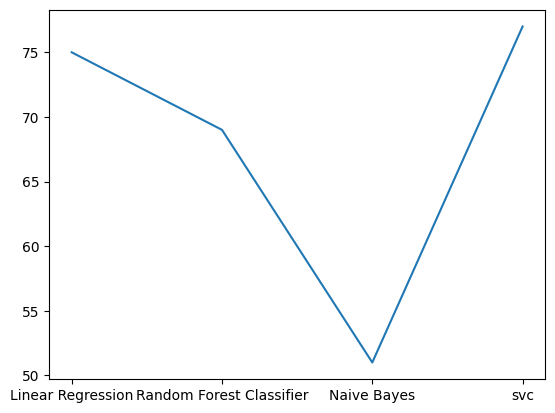

In [2]:
from matplotlib import pyplot as plt
plt.plot(df['model'],df['result'])